In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import TensorBoard


In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    """mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )"""
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [6]:



cap = cv2.VideoCapture(1)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
frame.shape

(480, 640, 3)

In [8]:
draw_landmarks(frame, results)

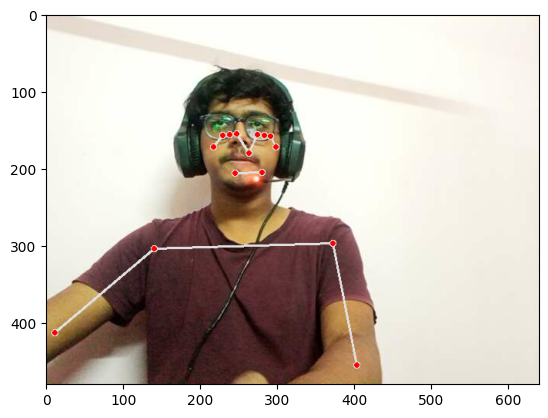

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
results.pose_landmarks.landmark

[x: 0.4110714793205261
y: 0.3759477734565735
z: -1.1116230487823486
visibility: 0.9963462352752686
, x: 0.4290538728237152
y: 0.3257826566696167
z: -1.0414817333221436
visibility: 0.9957976937294006
, x: 0.44307056069374084
y: 0.3278023600578308
z: -1.0420445203781128
visibility: 0.9958319664001465
, x: 0.45566004514694214
y: 0.33054718375205994
z: -1.042262315750122
visibility: 0.996147096157074
, x: 0.3868458867073059
y: 0.3240642547607422
z: -1.050249695777893
visibility: 0.9955021739006042
, x: 0.37233391404151917
y: 0.3252594769001007
z: -1.0506395101547241
visibility: 0.9952445030212402
, x: 0.35866886377334595
y: 0.32821905612945557
z: -1.051201343536377
visibility: 0.9955027103424072
, x: 0.46625322103500366
y: 0.3585974872112274
z: -0.5893990993499756
visibility: 0.9967655539512634
, x: 0.33928123116493225
y: 0.3587525486946106
z: -0.6237306594848633
visibility: 0.995987594127655
, x: 0.4381551146507263
y: 0.4290578067302704
z: -0.9386513829231262
visibility: 0.998495578765869

In [17]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [18]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [19]:
# Check if face landmarks are present
if results.face_landmarks:
    # Extract coordinates of facial landmarks and flatten the array
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
else:
    # Create an array of zeros to represent the absence of facial landmarks
    face = np.zeros(1404)  # Assuming there are 468 facial landmarks, each with 3 coordinates

# Proceed with further processing using the 'face' array
# For example, you can pass 'face' to another function or perform calculations with it


In [20]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [24]:
np.save('C:\\Users\\User\\Desktop\\New folder\\MP_Data\\hello\\0', result_test)


In [23]:
np.load('0.npy')

FileNotFoundError: [Errno 2] No such file or directory: '0.npy'

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('C:\\Users\\User\\Desktop\\New folder\\MP_Data')

# Actions that we try to detect
actions = np.array(['hello','thanks','yes','love','friend'])

# Thirty videos worth of data
no_sequences = 30
# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

In [22]:
DATA_PATH

'C:\\Users\\User\\Desktop\\New folder\\MP_Data'

In [23]:
for action in actions:

    for sequence in range(1,no_sequences+1):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            print(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

C:\Users\User\Desktop\New folder\MP_Data\hello\1
C:\Users\User\Desktop\New folder\MP_Data\hello\2
C:\Users\User\Desktop\New folder\MP_Data\hello\3
C:\Users\User\Desktop\New folder\MP_Data\hello\4
C:\Users\User\Desktop\New folder\MP_Data\hello\5
C:\Users\User\Desktop\New folder\MP_Data\hello\6
C:\Users\User\Desktop\New folder\MP_Data\hello\7
C:\Users\User\Desktop\New folder\MP_Data\hello\8
C:\Users\User\Desktop\New folder\MP_Data\hello\9
C:\Users\User\Desktop\New folder\MP_Data\hello\10
C:\Users\User\Desktop\New folder\MP_Data\hello\11
C:\Users\User\Desktop\New folder\MP_Data\hello\12
C:\Users\User\Desktop\New folder\MP_Data\hello\13
C:\Users\User\Desktop\New folder\MP_Data\hello\14
C:\Users\User\Desktop\New folder\MP_Data\hello\15
C:\Users\User\Desktop\New folder\MP_Data\hello\16
C:\Users\User\Desktop\New folder\MP_Data\hello\17
C:\Users\User\Desktop\New folder\MP_Data\hello\18
C:\Users\User\Desktop\New folder\MP_Data\hello\19
C:\Users\User\Desktop\New folder\MP_Data\hello\20
C:\Users\

In [25]:
cap = cv2.VideoCapture(1)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # NEW Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                print( npy_path+".npy")

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

C:\Users\User\Desktop\New folder\MP_Data\hello\1\0.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\1.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\2.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\3.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\4.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\5.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\6.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\7.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\8.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\9.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\10.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\11.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\12.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\13.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\14.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\15.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\16.npy
C:\Users\User\Desktop\New folder\MP_Data\hello\1\17.npy
C:

In [29]:
# HELLO
cap = cv2.VideoCapture(0)
action = 'yes'  # Collecting frames for "hello"
start_folder = 1  # Starting folder index
no_sequences = 30  # Number of sequences (videos)
sequence_length = 30  # Number of frames per sequence

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for sequence in range(start_folder, start_folder + no_sequences):
        for frame_num in range(sequence_length):
            ret, frame = cap.read()
            image, results = mediapipe_detection(frame, holistic)
            draw_styled_landmarks(image, results)

            if frame_num == 0:
                cv2.putText(image, 'STARTING COLLECTION', (120,200),
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15,12),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(50)
            else:
                cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15,12),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)

            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
            np.save(npy_path, keypoints)
            print(npy_path + ".npy")

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()

C:\Users\User\Desktop\New folder\MP_Data\yes\1\0.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\1.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\2.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\3.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\4.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\5.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\6.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\7.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\8.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\9.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\10.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\11.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\12.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\13.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\14.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\15.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\16.npy
C:\Users\User\Desktop\New folder\MP_Data\yes\1\17.npy
C:\Users\User\Desktop\New folder\MP_Da

C:\Users\User\Desktop\data\no\1\0.npy
C:\Users\User\Desktop\data\no\1\1.npy
C:\Users\User\Desktop\data\no\1\2.npy
C:\Users\User\Desktop\data\no\1\3.npy
C:\Users\User\Desktop\data\no\1\4.npy
C:\Users\User\Desktop\data\no\1\5.npy
C:\Users\User\Desktop\data\no\1\6.npy
C:\Users\User\Desktop\data\no\1\7.npy
C:\Users\User\Desktop\data\no\1\8.npy
C:\Users\User\Desktop\data\no\1\9.npy
C:\Users\User\Desktop\data\no\1\10.npy
C:\Users\User\Desktop\data\no\1\11.npy
C:\Users\User\Desktop\data\no\1\12.npy
C:\Users\User\Desktop\data\no\1\13.npy
C:\Users\User\Desktop\data\no\1\14.npy
C:\Users\User\Desktop\data\no\1\15.npy
C:\Users\User\Desktop\data\no\1\16.npy
C:\Users\User\Desktop\data\no\1\17.npy
C:\Users\User\Desktop\data\no\1\18.npy
C:\Users\User\Desktop\data\no\1\19.npy
C:\Users\User\Desktop\data\no\1\20.npy
C:\Users\User\Desktop\data\no\1\21.npy
C:\Users\User\Desktop\data\no\1\22.npy


KeyboardInterrupt: 

In [20]:
print(npy_path)

NameError: name 'npy_path' is not defined

In [120]:
cap.release()
cv2.destroyAllWindows()

In [30]:
import os

def create_subfolders(parent_folder, num_subfolders):
    # Create parent folder if it doesn't exist
    if not os.path.exists(parent_folder):
        os.makedirs(parent_folder)

    # Create subfolders
    for i in range(num_subfolders):
        subfolder_name = str(i)
        subfolder_path = os.path.join(parent_folder, subfolder_name)
        if not os.path.exists(subfolder_path):
            os.makedirs(subfolder_path)
        else:
            print(f"Subfolder '{subfolder_name}' already exists.")

# Path of the parent folder
parent_folder_path = r"C:\\Users\\User\\Desktop\\New folder\\MP_Data\\hello"

# Number of subfolders to create
num_subfolders = 30

# Call the function to create subfolders
create_subfolders(parent_folder_path, num_subfolders)


Subfolder '1' already exists.
Subfolder '2' already exists.
Subfolder '3' already exists.
Subfolder '4' already exists.
Subfolder '5' already exists.
Subfolder '6' already exists.
Subfolder '7' already exists.
Subfolder '8' already exists.
Subfolder '9' already exists.
Subfolder '10' already exists.
Subfolder '11' already exists.
Subfolder '12' already exists.
Subfolder '13' already exists.
Subfolder '14' already exists.
Subfolder '15' already exists.
Subfolder '16' already exists.
Subfolder '17' already exists.
Subfolder '18' already exists.
Subfolder '19' already exists.
Subfolder '20' already exists.
Subfolder '21' already exists.
Subfolder '22' already exists.
Subfolder '23' already exists.
Subfolder '24' already exists.
Subfolder '25' already exists.
Subfolder '26' already exists.
Subfolder '27' already exists.
Subfolder '28' already exists.
Subfolder '29' already exists.


In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
label_map = {label:num for num, label in enumerate(actions)}

In [33]:
label_map

{'hello': 0, 'thanks': 1, 'yes': 2, 'love': 3, 'friend': 4}

In [34]:
sequences, labels = [], []
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    # Filter out only directories representing valid sequence numbers
    sequences_dirs = [name for name in os.listdir(action_path) if os.path.isdir(os.path.join(action_path, name))]
    # Sort the directory names in ascending order
    sequences_dirs.sort(key=lambda x: int(x))
    for sequence_dir in sequences_dirs:
        try:
            sequence_num = int(sequence_dir)
        except ValueError:
            print(f"Ignoring directory '{sequence_dir}' in '{action}' as it doesn't represent a valid sequence number")
            continue
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(action_path, sequence_dir, f"{frame_num}.npy"))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [35]:
np.array(sequences).shape

(150, 30, 1662)

In [36]:
np.array(labels).shape

(150,)

In [37]:
X = np.array(sequences)

In [38]:

X.shape

(150, 30, 1662)

In [39]:
y = to_categorical(labels).astype(int)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02)

In [41]:
y_test.shape

(3, 5)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import CSVLogger,EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

In [38]:
log_dir = os.path.join('Logs.csv')
model_dir=os.path.join('action.keras')

In [43]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are already defined

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Model architecture
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # Adjust input shape accordingly
model.add(Dropout(0.5))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Adjust output shape based on your labels

model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('action.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

# Training the model
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=callbacks)


Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 1.6223 - categorical_accuracy: 0.1905

ValueError: The following argument(s) are not supported with the native Keras format: ['options']

In [44]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [122]:
callbacks = [
    ModelCheckpoint(model_dir, verbose = 1, save_best_only=True),
    ReduceLROnPlateau(monitor="categorical_accuracy", factor=0.1, patience=4),
    CSVLogger(log_dir),
    EarlyStopping(monitor="categorical_accuracy", patience=10, restore_best_weights=False)
    ]

NameError: name 'model_dir' is not defined

In [45]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [46]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
5/5 [==============================] - 4s 100ms/step - loss: 2.1744 - categorical_accuracy: 0.1633
Epoch 2/2000
5/5 [==============================] - 0s 89ms/step - loss: 1.6719 - categorical_accuracy: 0.1565
Epoch 3/2000
5/5 [==============================] - 0s 91ms/step - loss: 1.6756 - categorical_accuracy: 0.1701
Epoch 4/2000
5/5 [==============================] - 0s 95ms/step - loss: 1.5883 - categorical_accuracy: 0.2993
Epoch 5/2000
5/5 [==============================] - 0s 90ms/step - loss: 1.4337 - categorical_accuracy: 0.3810
Epoch 6/2000
5/5 [==============================] - 0s 89ms/step - loss: 1.4956 - categorical_accuracy: 0.2993
Epoch 7/2000
5/5 [==============================] - 0s 98ms/step - loss: 1.4639 - categorical_accuracy: 0.5170
Epoch 8/2000
5/5 [==============================] - 0s 94ms/step - loss: 1.4389 - categorical_accuracy: 0.3537
Epoch 9/2000
5/5 [==============================] - 1s 103ms/step - loss: 1.2605 - categorical_accuracy: 0.5306

KeyboardInterrupt: 

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 596741 (2.28 MB)
Trainable params: 596741 

In [48]:
res = model.predict(X_test)

1/1 [==============================] - 0s 435ms/step


In [49]:
actions[np.argmax(res[1])]

'friend'

In [46]:
actions[np.argmax(y_test[1])]

'yes'

In [50]:
model.save('action.h5')

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
del model

In [47]:
from keras.models import load_model

In [48]:
model=load_model('action.h5')

In [49]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
import numpy as np

In [61]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 84ms/step


In [51]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()


In [52]:
print(ytrue)
yhat


[0, 3, 0, 1, 4, 4, 0, 1, 2]


[5, 5, 5, 5, 5, 5, 5, 5, 5]

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have already generated yhat and ytrue as per your code
#yhat = np.argmax(model.predict(X_test), axis=1).tolist()
#ytrue = np.argmax(y_test, axis=1).tolist()

# Generate the confusion matrix
conf_matrix = confusion_matrix(ytrue, yhat)

# Plot the confusion matrix
plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=actions, yticklabels=actions)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Optional: Print a classification report
print(classification_report(ytrue, yhat, target_names=actions))


ModuleNotFoundError: No module named 'seaborn'

In [45]:
!pip install seaborn

In [54]:
import sys
print(sys.executable)


c:\Users\User\AppData\Local\Programs\Python\Python310\python.exe


In [55]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[6., 0.],
        [3., 0.]],

       [[7., 0.],
        [2., 0.]],

       [[8., 0.],
        [1., 0.]],

       [[8., 0.],
        [1., 0.]],

       [[7., 0.],
        [2., 0.]],

       [[0., 9.],
        [0., 0.]]])

In [56]:
accuracy_score(ytrue, yhat)

0.0

In [57]:
from scipy import stats

In [58]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    return output_frame

In [59]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [52]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))


        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold:

                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [37]:
import cv2
import numpy as np
import pyttsx3
import mediapipe as mp

# Initialize the pyttsx3 engine
engine = pyttsx3.init()

# Function to convert text to speech
def speak_text(text):
    engine.say(text)
    engine.runAndWait()

# Existing variables and settings
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
mp_holistic = mp.solutions.holistic

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            # Viz logic
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:

                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                            speak_text(actions[np.argmax(res)])  # Speak the action
                    else:
                        sentence.append(actions[np.argmax(res)])
                        speak_text(actions[np.argmax(res)])  # Speak the action

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'pyttsx3'

In [4]:
import cv2
import numpy as np
import pyttsx3
import mediapipe as mp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from keras.models import load_model



mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

def draw_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

def draw_styled_landmarks(image, results):
    # Draw face connections
    """mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )"""
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )


def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

actions = np.array(['hello', 'thanks', 'iloveyou'])

colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    return output_frame


model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


model=load_model('newmodel.h5')



# Initialize the pyttsx3 engine
engine = pyttsx3.init()



# Function to convert text to speech
def speak_text(text):
    engine.say(text)
    engine.runAndWait()

# Existing variables and settings
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
mp_holistic = mp.solutions.holistic

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            # Viz logic
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:

                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                            speak_text(actions[np.argmax(res)])  # Speak the action
                    else:
                        sentence.append(actions[np.argmax(res)])
                        speak_text(actions[np.argmax(res)])  # Speak the action

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'pyttsx3'

In [6]:

!pip3 uninstall pyttsx3

^C
